# Выбор локации для скважины

<b>Цели проекта:</b>  
Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap. 
  
<b>Задачи проекта:</b>  
1. провести предобработку данных;
2. разбить данные на выборки;  
3. обучить модель и сделать предсказания;  
4. рассчитать точку безубыточности;  
5. применить технику Bootstrap;  
6. найти среднюю прибыль, 95%-й доверительный интервал и риск убытков
7. сделать общие выводы.

<b>Данные:</b>  
Данные геологоразведки трёх регионов из добывающей компании «ГлавРосГосНефть».

<b>Описание данных</b>  
Признаки
- <code>id</code> — никальный идентификатор скважины
- <code>f0</code> — признак точки
- <code>f1</code> — признак точки
- <code>f2</code> — признак точки 
  
Целевой признак
- <code>product</code> — объём запасов в скважине (тыс. баррелей)

<b>Содержание</b>  
1. Загрузка и подготовка данных
2. Обучение и проверка модели
    - первый регион
    - второй регион
    - третий регион
3. Подготовка к расчёту прибыли
4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели
5. Расчёт прибыли и рисков
6. Общие выводы

## Загрузка и подготовка данных

In [1]:
# импортировать библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
# записать файлы в data

try: 
    data_0 = pd.read_csv('/datasets/geo_data_0.csv', sep=',')
except:
    data_0 = pd.read_csv('geo_data_0.csv', sep=',')
    
try: 
    data_1 = pd.read_csv('/datasets/geo_data_1.csv', sep=',')
except:
    data_1 = pd.read_csv('geo_data_1.csv', sep=',')
    
try: 
    data_2 = pd.read_csv('/datasets/geo_data_2.csv', sep=',')
except:
    data_2 = pd.read_csv('geo_data_2.csv', sep=',')

In [3]:
data = [data_0, data_1, data_2]

In [4]:
# напечатать данные
for item in data:
    print(item.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [5]:
# изучить файлы: метод info()
for item in data:
    print(item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

Пропуски нигде не обнаружены. Типы данных все верные.

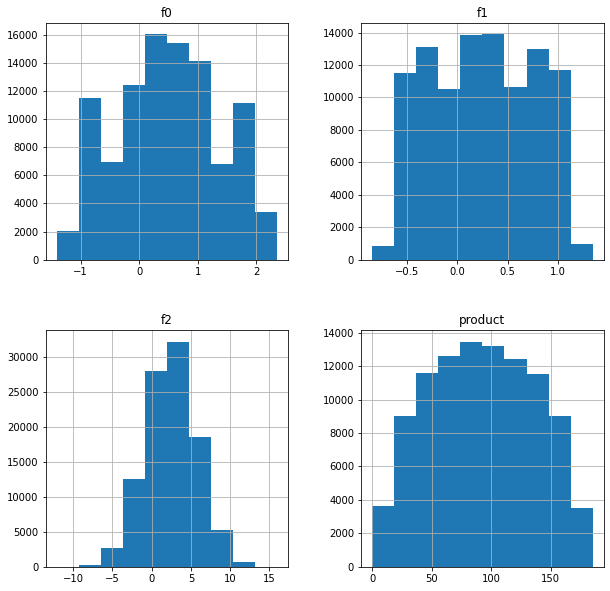

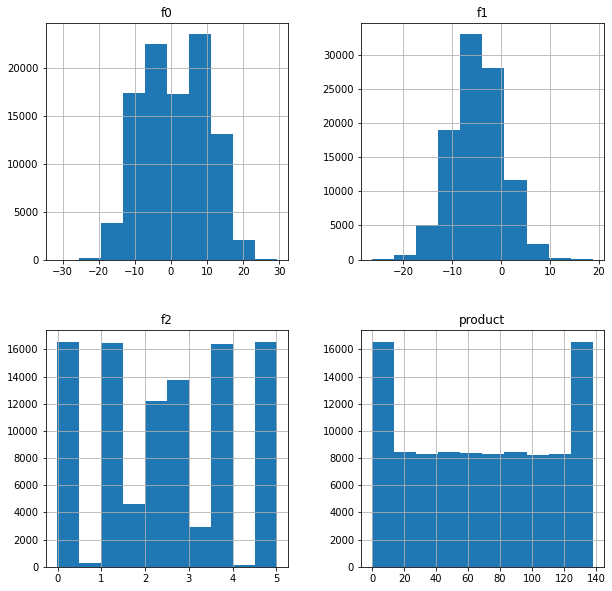

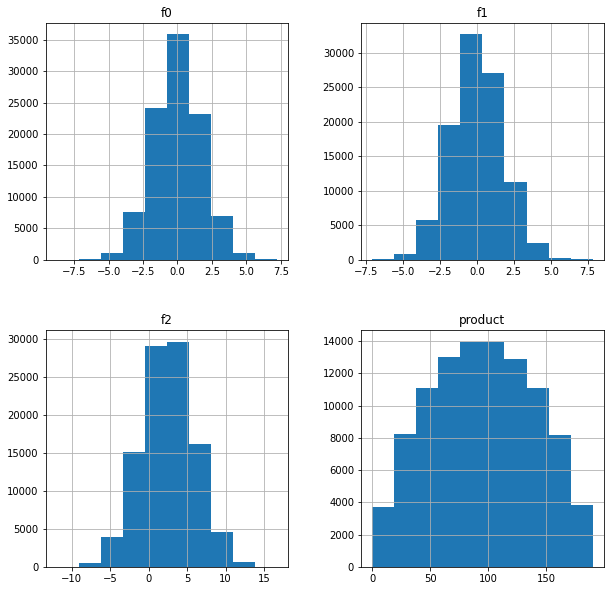

In [6]:
# изучить файлы: гистограммы
for item in data:
    item.hist(figsize=(10, 10));

In [7]:
# изучение данных: метод describe()
for item in data:
    print(item.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

In [8]:
# поиск дубликатов
for item in data:
    print(item.duplicated().sum())

0
0
0


Дубликатов нет.

In [9]:
# определить размер data
for item in data:
    print(item.shape)

(100000, 5)
(100000, 5)
(100000, 5)


In [10]:
# изучить файлы: метод corr()
for item in data:
    print(item.corr())

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


<b>ИТОГИ</b>
1. Импортирована библиотека pandas и открыты файлы.
2. Изучены файлы выводом первых 10 строк.
3. Изучены файлы методом <i>info()</i>.
4. Построены гистограммы.  
5. Дубликатов не обнаружено.
6. Аномальных значений не обнаружено.

## Обучение и проверка модели

### Первый регион

In [11]:
target_0 = data_0['product']
features_0 = data_0.drop(['product', 'id'], axis=1)

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, 
                                                                                      target_0, test_size=0.25, 
                                                                                      random_state=12345)

In [12]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_valid_0 = model_0.predict(features_valid_0)
mse_0 = mean_squared_error(target_valid_0, predicted_valid_0)


print("MSE =", mse_0)
print("RMSE =", mse_0 ** 0.5)
print('Средний запас предсказанного сырья =', predicted_valid_0.mean())

MSE = 1412.2129364399243
RMSE = 37.5794217150813
Средний запас предсказанного сырья = 92.59256778438035


### Второй регион

In [13]:
target_1 = data_1['product']
features_1 = data_1.drop(['product', 'id'], axis=1)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, 
                                                                                      target_1, test_size=0.25, 
                                                                                      random_state=12345)

In [14]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)
mse_1 = mean_squared_error(target_valid_1, predicted_valid_1)


print("MSE =", mse_1)
print("RMSE =", mse_1 ** 0.5)
print('Средний запас предсказанного сырья =', predicted_valid_1.mean())

MSE = 0.7976263360391157
RMSE = 0.893099286775617
Средний запас предсказанного сырья = 68.728546895446


### Третий регион

In [15]:
target_2 = data_2['product']
features_2 = data_2.drop(['product', 'id'], axis=1)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, 
                                                                                      target_2, test_size=0.25, 
                                                                                      random_state=12345)

In [16]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)
mse_2 = mean_squared_error(target_valid_2, predicted_valid_2)


print("MSE =", mse_2)
print("RMSE =", mse_2 ** 0.5)
print('Средний запас предсказанного сырья =', predicted_valid_2.mean())

MSE = 1602.3775813236196
RMSE = 40.02970873393434
Средний запас предсказанного сырья = 94.96504596800489


<b>ИТОГИ</b>

MSE - метрика, которая сообщает нам среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MSE, тем лучше модель соответствует набору данных. RMSE - квадратный корень из MSE. Чем ниже RMSE, тем лучше модель соответствует набору данных.  
  
В моделях для первого и третьего регионов довольно большие значения MSE и RMSE. Но во второй модели меньше средний запас предсказанного сырья.

## Подготовка к расчёту прибыли

In [17]:
# константы
BUDGET = 10000000000
ONE_BARREL = 450
FROM_PRODUCT = 450000

FOR_SEARCHING = 500
FOR_THE_BEST = 200

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Поэтому, чтобы найти бюджет на разработку одной точки, нужно общий бюджет поделить на 200 (так как бюджет выделен на 200 точек).

In [18]:
# бюджет на одну точку
budget_for_point = BUDGET / FOR_THE_BEST
print('Бюджет на разработку одной точки = ', budget_for_point)

Бюджет на разработку одной точки =  50000000.0


In [19]:
# точка безубыточности
breakeven = budget_for_point / FROM_PRODUCT
print('Точка безубыточности = ', round(breakeven), 'тыс. баррелей')

Точка безубыточности =  111 тыс. баррелей


In [20]:
# средний объем сырья по регионам
product_mean_0 = data_0['product'].mean()
product_mean_1 = data_1['product'].mean()
product_mean_2 = data_2['product'].mean()
print('Средний объём сырья в 1 регионе', round(product_mean_0, 1))
print('Средний объём сырья во 2 регионе', round(product_mean_1, 1))
print('Средний объём сырья в 3 регионе', round(product_mean_2, 1))

Средний объём сырья в 1 регионе 92.5
Средний объём сырья во 2 регионе 68.8
Средний объём сырья в 3 регионе 95.0


<b>ИТОГИ</b> 
  
Средний объём сырья в каждом регионе меньше достаточного объёма сырья для безубыточной разработки новой скважины.

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [21]:
def profit(prediction, target, count):
    probs_sorted = pd.Series(prediction, index=target.index).sort_values(ascending=False)
    selected = probs_sorted[:count].sum()
    profit = (selected * FROM_PRODUCT) - BUDGET
    print('Запас сырья в 200 лучших скважинах по предсказаниям модели = %.2f тысяч баррелей'%selected)
    print('Прибыль для полученного объёма сырья = %.2f млн рублей'%(profit/1000000))

1 регион

In [22]:
profit(predicted_valid_0, target_valid_0, FOR_THE_BEST)

Запас сырья в 200 лучших скважинах по предсказаниям модели = 31102.33 тысяч баррелей
Прибыль для полученного объёма сырья = 3996.05 млн рублей


2 регион

In [23]:
profit(predicted_valid_1, target_valid_0, FOR_THE_BEST)

Запас сырья в 200 лучших скважинах по предсказаниям модели = 27746.03 тысяч баррелей
Прибыль для полученного объёма сырья = 2485.71 млн рублей


3 регион

In [24]:
profit(predicted_valid_2, target_valid_0, FOR_THE_BEST)

Запас сырья в 200 лучших скважинах по предсказаниям модели = 29603.90 тысяч баррелей
Прибыль для полученного объёма сырья = 3321.75 млн рублей


<b>ИТОГИ</b>  
  
Наибольший суммарный запас сырья в 200 лучших скважинах по предсказаниям модели будет в 1 регионе.

## Расчёт прибыли и рисков 

In [25]:
# функция для подсчёта прибыли
def profit(prediction, target, count):
    probs_sorted = pd.Series(prediction).sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    product = selected.sum()
    revenue = product * FROM_PRODUCT
    return revenue - BUDGET

# bootstrap
def profit_and_risks (target, prediction, showplot=False):
    state = np.random.RandomState(12345)
    predict = pd.Series(prediction, index=target.index)
    values = []
    loss = 0
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index] 
        values.append(profit(probs_subsample, target_subsample, 200))
    # находим количество кейсов, когда прибыль меньше 0
    for item in values:
        if item < 0:
            loss +=1

    values = pd.Series(values)
    # средняя прибыль
    mean = values.mean()
    
    # доверительный интервал
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    print('Средняя прибыль = {:.2f} млн руб'.format(mean/1000000))
    print('95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн руб'.format(lower/1000000, upper/1000000))
    print ('Риск убытков = {:.1%}'.format(loss/1000))

### Первый регион

In [27]:
values_0 = profit_and_risks(target_valid_0, predicted_valid_0, True)

Средняя прибыль = 425.94 млн руб
95%-ый доверительный интервал: от -102.09 млн.руб до 947.98 млн руб
Риск убытков = 6.0%


### Второй регион

In [28]:
profit_and_risks(target_valid_1, predicted_valid_1)

Средняя прибыль = 515.22 млн руб
95%-ый доверительный интервал: от 68.87 млн.руб до 931.55 млн руб
Риск убытков = 1.0%


### Третий регион

In [29]:
profit_and_risks(target_valid_2, predicted_valid_2)

Средняя прибыль = 435.01 млн руб
95%-ый доверительный интервал: от -128.88 млн.руб до 969.71 млн руб
Риск убытков = 6.4%


После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них нужно выбрать регион с наибольшей средней прибылью.

<b>ИТОГИ</b>  
  
Пороговое значение в 2.5% проходит только второй регион с риском убытков 1% и средней прибылью 515.22 млн рублей. В этом регионе наименьший процент риска убытков и наибольшаяя средняя прибыль среди всех регионовп

## Общие выводы

1. Проведена предобработка данных
    - Импортирована библиотека pandas и открыты файлы.
    - Изучены файлы выводом первых 10 строк.
    - Изучены файлы методом <i>info()</i>.
    - Построены гистограммы.  
    - Дубликатов не обнаружено.
    - Аномальных значений не обнаружено.
2. Обучены и проверены модели для каждого региона
    - Данные разбиты на обучающую и валидационную выборки в соотношении 75:25.
    - Обучена модель (линейная регрессия) и сделаны предсказания на валидационной выборке.
    - В моделях для первого и третьего регионов довольно большие значения MSE и RMSE. Но во второй модели меньше средний запас предсказанного сырья.
3. Посчитан достаточный объём сырья для безубыточной разработки новой скважины (= 111 000 баррелей)
4. Написана функция для расчёта прибыли по выбранным скважинам и предсказаниям модели (наибольший суммарный запас сырья в 200 лучших скважинах по предсказаниям модели будет в 1 регионе).
5. Посчитаны риски и прибыль для каждого региона
    - Использована техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    - Найдена средняя прибыль, 95%-й доверительный интервал и риск убытков.
    - Предложен второй регион для разработки скважин, так как он единственный проходит пороговый интервал риска убытков в 2.5%, а также средняя прогнозируемая прибыль в этом регионе самая большая.